<a href="https://colab.research.google.com/github/AnwarMirza/SEP740-Deep-Learning-McMaster-Summer2023/blob/main/10Iris_Dataset_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Dataset
<!-- ![picture](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png) -->
<img src="https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png" width="80%"/>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems* as an example of linear discriminant analysis.[[1]](https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=The%20Iris%20flower%20data%20set,example%20of%20linear%20discriminant%20analysis.) It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[[2]](https://www.jstor.org/stable/2394164?origin=crossref) [[3]](http://biostor.org/reference/11559) Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn_pandas import DataFrameMapper

#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick


Load the iris dataset. You can also check the stackoverflow link [here](httphttps://stackoverflow.com/questions/28417293/sample-datasets-in-pandass://) to see sample datasets in the form of Pandas DataFrme.

In [ ]:
# Load the iris dataset from sci-kit learn
iris = sns.load_dataset('iris')

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Now lets see how many of how many data samples are for each one the iris species. We make a crosstable in pandas by using iris['species'] as the index and making a column of counts.

In [ ]:
iris_frequency_ditribution = pd.crosstab(index=iris['species'],
                                         columns='count')
iris_frequency_ditribution

col_0,count
species,
setosa,50
versicolor,50
virginica,50


data classes

Make frequency **Distribution Plots** (histograms)

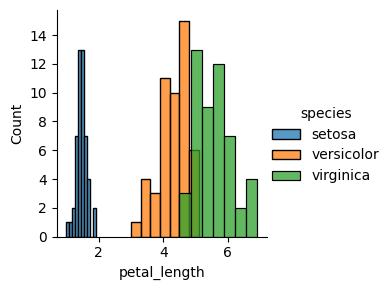

In [ ]:
sns.FacetGrid(iris, hue="species").map(sns.histplot, 'petal_length').add_legend()

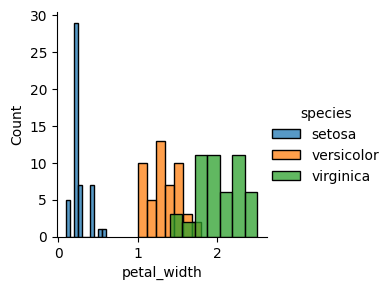

In [ ]:
sns.FacetGrid(iris, hue="species").map(sns.histplot, 'petal_width').add_legend()

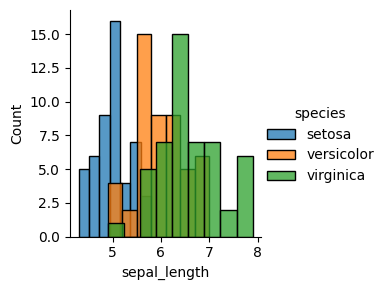

In [ ]:
sns.FacetGrid(iris, hue="species").map(sns.histplot, 'sepal_length').add_legend()

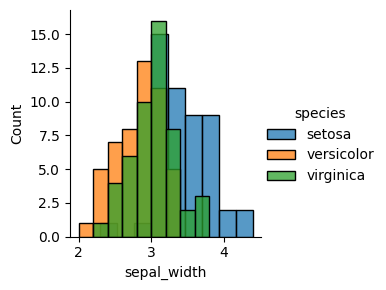

In [ ]:
sns.FacetGrid(iris, hue="species").map(sns.histplot, 'sepal_width').add_legend()

**Scatter Plots**

We use `seaborn`'s `pairplot` function to plot pairwise relationships in the iris dataset. It creates a grid of axes such that each numeric variable in the `dataframe` (`iris` in this case) will be shared across the y-axes across a single row and x-axes cross a single column. The digonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the `dataframe` in each column.

By default (which we are using), `scatterplot()` is used for each pairing of the variables and `histplot()` is used for marginal plots along the diagonal.

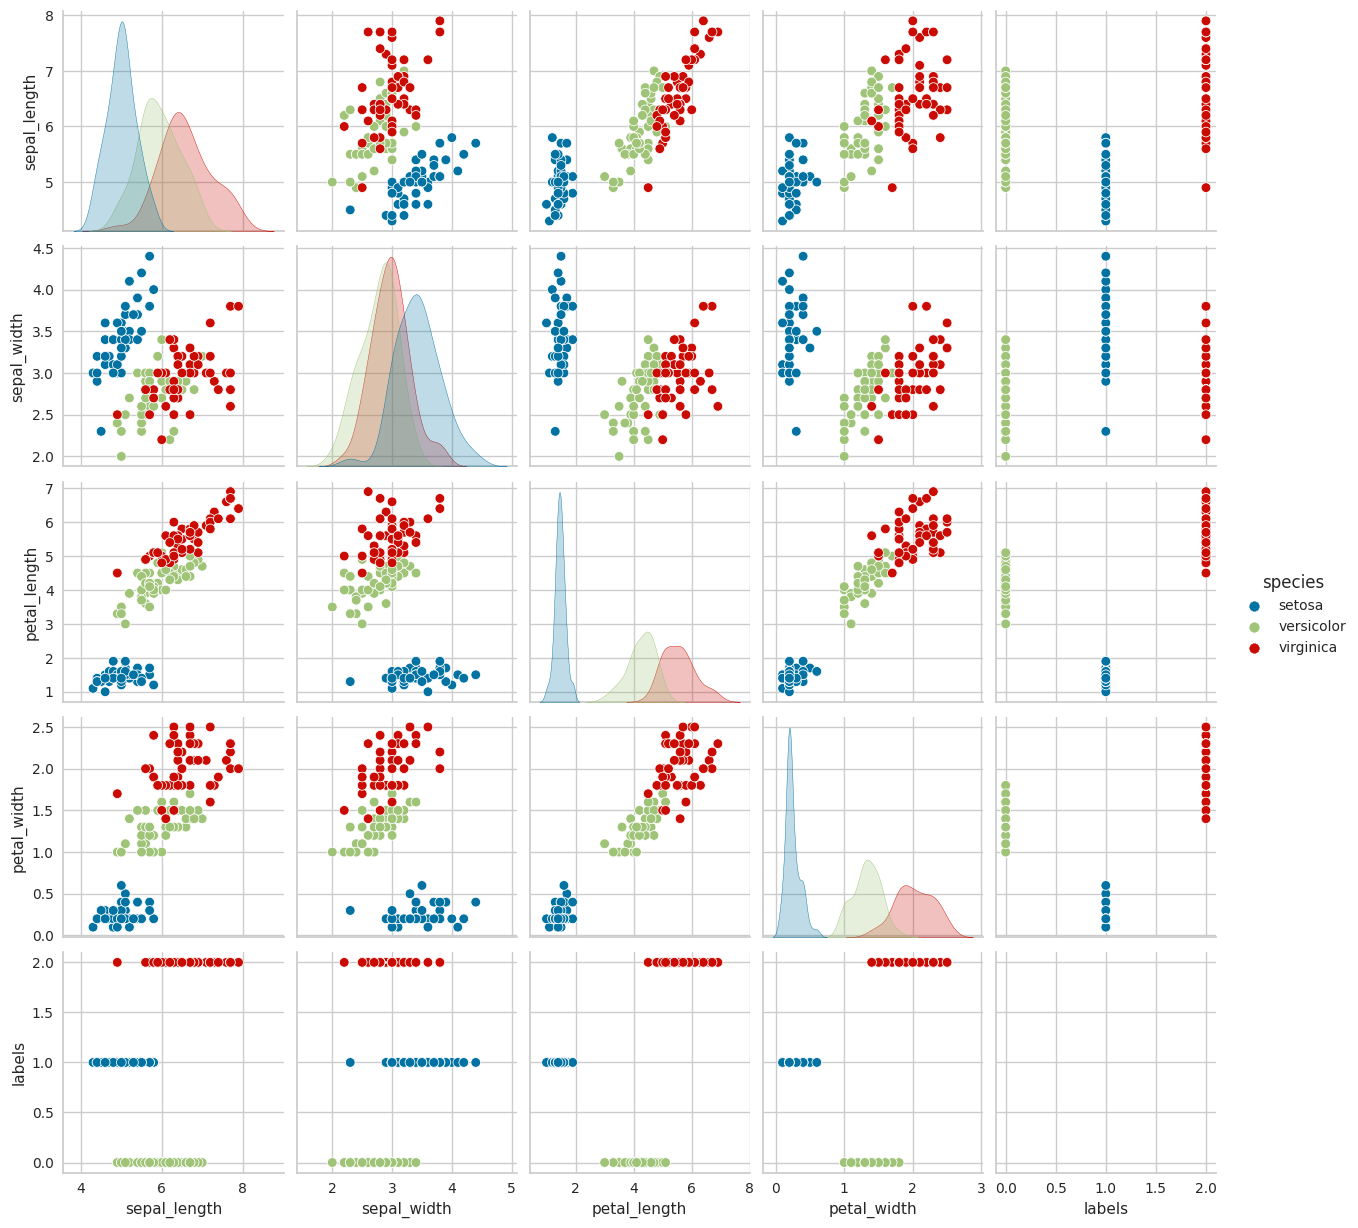

In [ ]:
sns.set_style('whitegrid')
# sns.set_style('darkgrid')
sns.pairplot(iris, hue='species')
plt.show()

# Implemetation of K-Means Clustering
## Steps
1. Select the number of clusters k
2. Set k random points from the data as cluster centroids
3. Assign all the points to the closest cluster centroids
4. Recompute the centroids of the newly determined clusters
5. Repeat steps 3 and 4.

If yoy look at the [documentation of KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), you will notice that the KMeans object belongs to the class defined by

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')`

where

* `n_clusters` is the number of clusters (centroid) to generate (default is 8).
* `init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’` is a method of initialization, where
  * `k-means++` selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia.
  * `random` chooses `n_clusters` observations (rows) at randon from data for initial centroids
  * The other two options can be looked into the documentation link provided.
* `max_iter` is the maxumumm number of iterations of the k-means algorithm for a single run.
* `n_init` can be set to `auto` or an integer value (default = 10). It is the number of times the k-means algorithm is run with different centroid seeds. The final result is the best output of `n_init` consecutive runs in terms of inertia.
* `random_state` could be an integer, `RandomState` instance or `None` (default is None). It determines random number generatiion for centroid initialization.
* `algorithm` could be `lloyd` or `elkan` (default being lloyd).


In [ ]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
x = iris.iloc[:,[0, 1, 2, 3]].values
y = iris.iloc[:,4].values
# x, y

In [ ]:
def label_species(row):
  if row['species'] == 'setosa':
    return 1
  if row['species'] == 'versicolor':
    return 0
  if row['species'] == 'virginica':
    return 2

In [ ]:
iris['labels'] = iris.apply(label_species, axis=1)

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
y_labels = iris.iloc[:,5].values

Check the dataframe keys again (the `labels` key should now be added):

In [ ]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'labels'],
      dtype='object')

Initialize KMeans object with 3 cluster, and other values to create the `kmeans` object. The `fit_pridict()` function can be called to find the K-Means clusters ofor our data in `x`.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000, n_init = 50, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Comparing the already given labels with the cluster labels, we note that the K-Means is not giving good results where `versicolor` and `virginica` species are overlapping (as can be seen below in the scatter plots).

In [ ]:
y_labels, y_kmeans

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

Now let's visualize the results

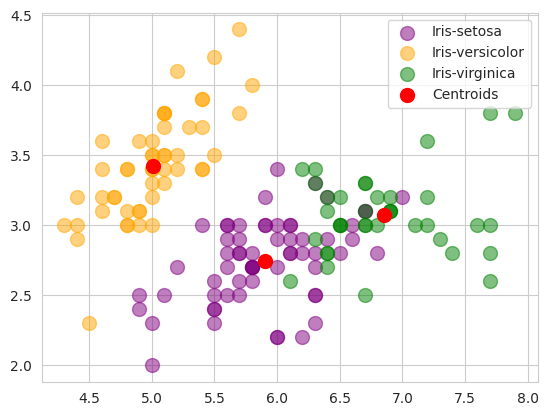

In [ ]:
# cluster visualization
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans == 0, 1], s=100, c='purple', label='Iris-setosa', alpha=0.5)
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans == 1, 1], s=100, c='orange', label='Iris-versicolor', alpha=0.5)
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica', alpha=0.5)

# plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
# display the legend
plt.legend(loc='upper right')

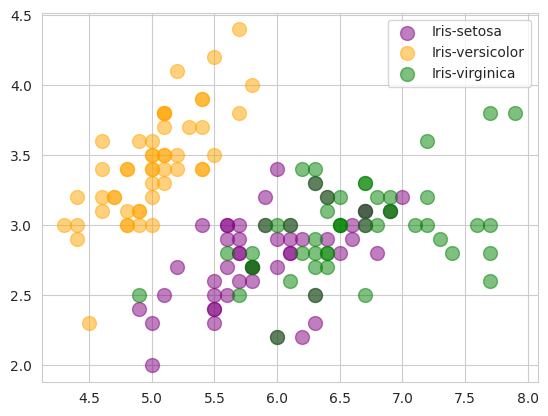

In [ ]:
# Actual Data

# cluster visualization
plt.scatter(x[y_labels ==0, 0], x[y_labels == 0, 1], s=100, c='purple', label='Iris-setosa', alpha=0.5)
plt.scatter(x[y_labels ==1, 0], x[y_labels == 1, 1], s=100, c='orange', label='Iris-versicolor', alpha=0.5)
plt.scatter(x[y_labels ==2, 0], x[y_labels == 2, 1], s=100, c='green', label='Iris-virginica', alpha=0.5)

# # plot the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
# display the legend
plt.legend(loc='upper right')

# Finding the Optimal Number of Clusters (K)
In the above example, we have used K=3, because of our prior knowledge about Iris dataset. However, for general clustering problems using K-Means, the value of K is generally assumed. To find the optimal value for K, we run K-Means several times for various values of K and find the optimal K usually by:
* the Elbow method
* the Silhouette score method

## The Elbow Method
The **elbow method is a graphical representation of finding the optimal ‘K’** in a K-means clustering. It works by finding <font color='blue'>WCSS</font> (**Within-Cluster Sum of Square**) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

We use yelowbrick to visualize the Elbow curve in the following code snippet.

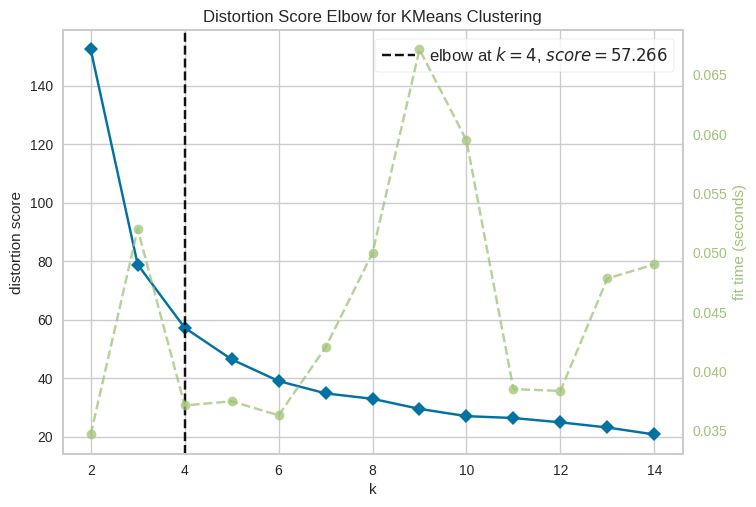

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(km, k=(2,15))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The above graph shows that the selected Elbow point is at K = 4, however, K = 3 could also be a good point.

This shows that Elbow method can sometimes be undecisive, based on the curvature of the elbow (where it starts and where it ends).

The alternate to this the **Silhouette Score Method**.

# Silhouette Score Method [[1]](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [[2]](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#:~:text=The%20score%20is%20calculated%20by,normalized%20by%20the%20maximum%20value.)
Assume that we have clustered data for some K using K-Means. For data point $i \in C_I$ (data point $i$ in the cluster $C_I$), let
$$
a(i) = \frac{1}{|C_I|-1} \sum_{j\in C_I, i\neq j} d(i,j)
$$
be the mean distance between $i$ and all other data points in the same cluster, where $|C_I|$ is the number of points belonging to the cluster $C_I$, and $d(i,j)$ is the distance between the data points $i$ and $j$ the cluster $C_I$.

For each data point $i\in C_I$, we also define
$$
b(i) = \min_{J\neq I} \frac{1}{|C_I|} \sum_{J\in C_J} d(i,j)
$$
be the smallest mean distance of $i$ to all points in any other cluster of which $i$ is not a member. The cluster with this smallest mean dissimilarity is said to be the "neighbouring cluster" of $i$ because it is the next best fit clurster for this point $i$.

The **silhouette coefficient** for data point $i$ is defined as
$$
s(i) = \frac{b(i)-a(i)}{\max\{a(i), b(i)\}}, \quad\text{if} \; |C_I| \gt 1
$$
and
$$
s(i) = 0, \quad\text{if} \; |C_I| = 1
$$
Which can be written as
$$
s(i) =
\left\{ \begin{array}{ll}
1-a(i)/b(i), & \text{if}\; a(i) \lt b(i) \\
0, & \text{if}\; a(i) = b(i) \\
b(i)/i(i)-1, & \text{if}\; a(i) \gt b(i)
\end{array}\right.
$$
This shows that teh silhouette coefficient $s(i)$ is always bounded as
$$ -1 \le s(i) \le +1$$
The **silhouette score** is calculated by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

In `SilhouetteVisualizer` plots, the silhouette score is shown as a red dotted line. The value of this score can be obtained for a particular K, from the `visualizer`, as shown in the following code.

K =  2  silhouette score =  0.6810461692117465
K =  3  silhouette score =  0.5528190123564102
K =  4  silhouette score =  0.49805050499728815
K =  5  silhouette score =  0.48874888709310654


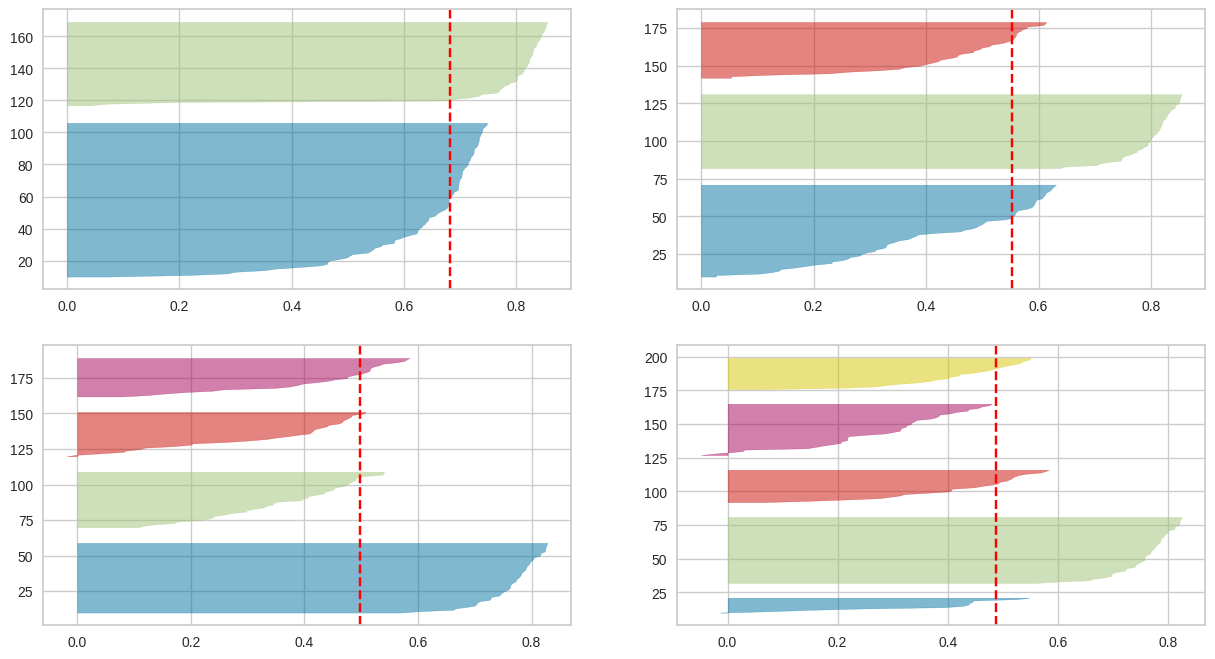

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    print('K = ', i, ' silhouette score = ', visualizer.silhouette_score_)

## How to select K from silhouette scores?
We mus keep in mind the following points when deciding about the optimal value for K from silhouette score [[see this link]](https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d#:~:text=The%20elbow%20method%20is%20a,cluster%20and%20the%20cluster%20centroid.):
1. For a particular K, **all the cluster should have a Silhouette score more than the average score of the dataset** (represented by a red dotted line). In the above example with iris dataset, we note that for K = 4 and 5, this condition is not met. There is always a cluster that is smaller that the value given by the red line in these cases (K = 4 and K = 5).
2. **There should not be wide fluctuations in the size of the clusters**. The cluster size (width) represents the number of data points. For K = 2 above, the blue cluster is way too big compared to the green cluster. This blue cluster gets broken down into two sub-cluster as we change K from 2 to K = 3. For K = 3, the cluster are of uniform sizes.

Therefore, the **Silhouette score method gives us K = 3 as the optimal value for the Iris dataset**.